In [1]:
#cargamos la data de iris de sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cargamos la data palmerpenguins
# ya hice pip install palmerpenguins
from palmerpenguins import load_penguins
df = load_penguins()
# definimos la df
df = pd.DataFrame(df)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    str    
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), str(3)
memory usage: 21.6 KB


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [3]:
# quitamos los valores nulos
df = df.dropna()
df.isnull().sum().sum()

np.int64(0)

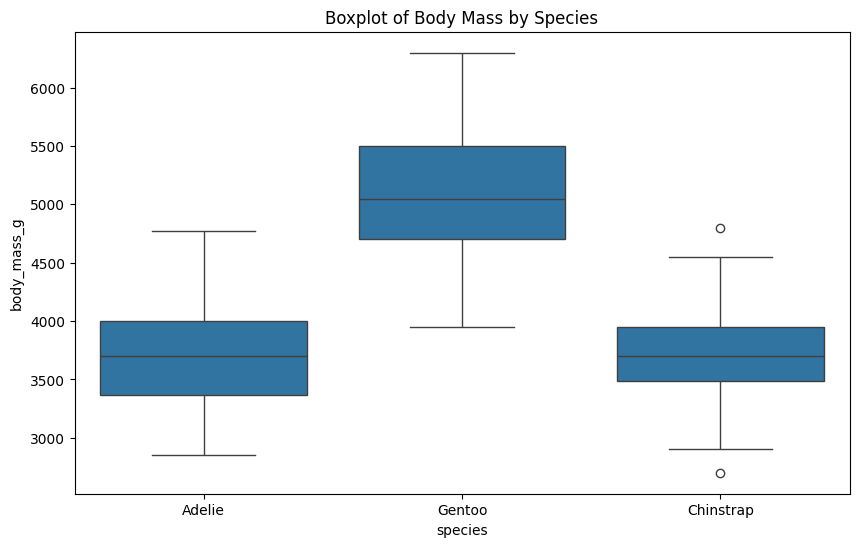

In [27]:
# boxplot de body_mass_g por especie
plt.figure(figsize=(10,6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Boxplot of Body Mass by Species')
plt.show()

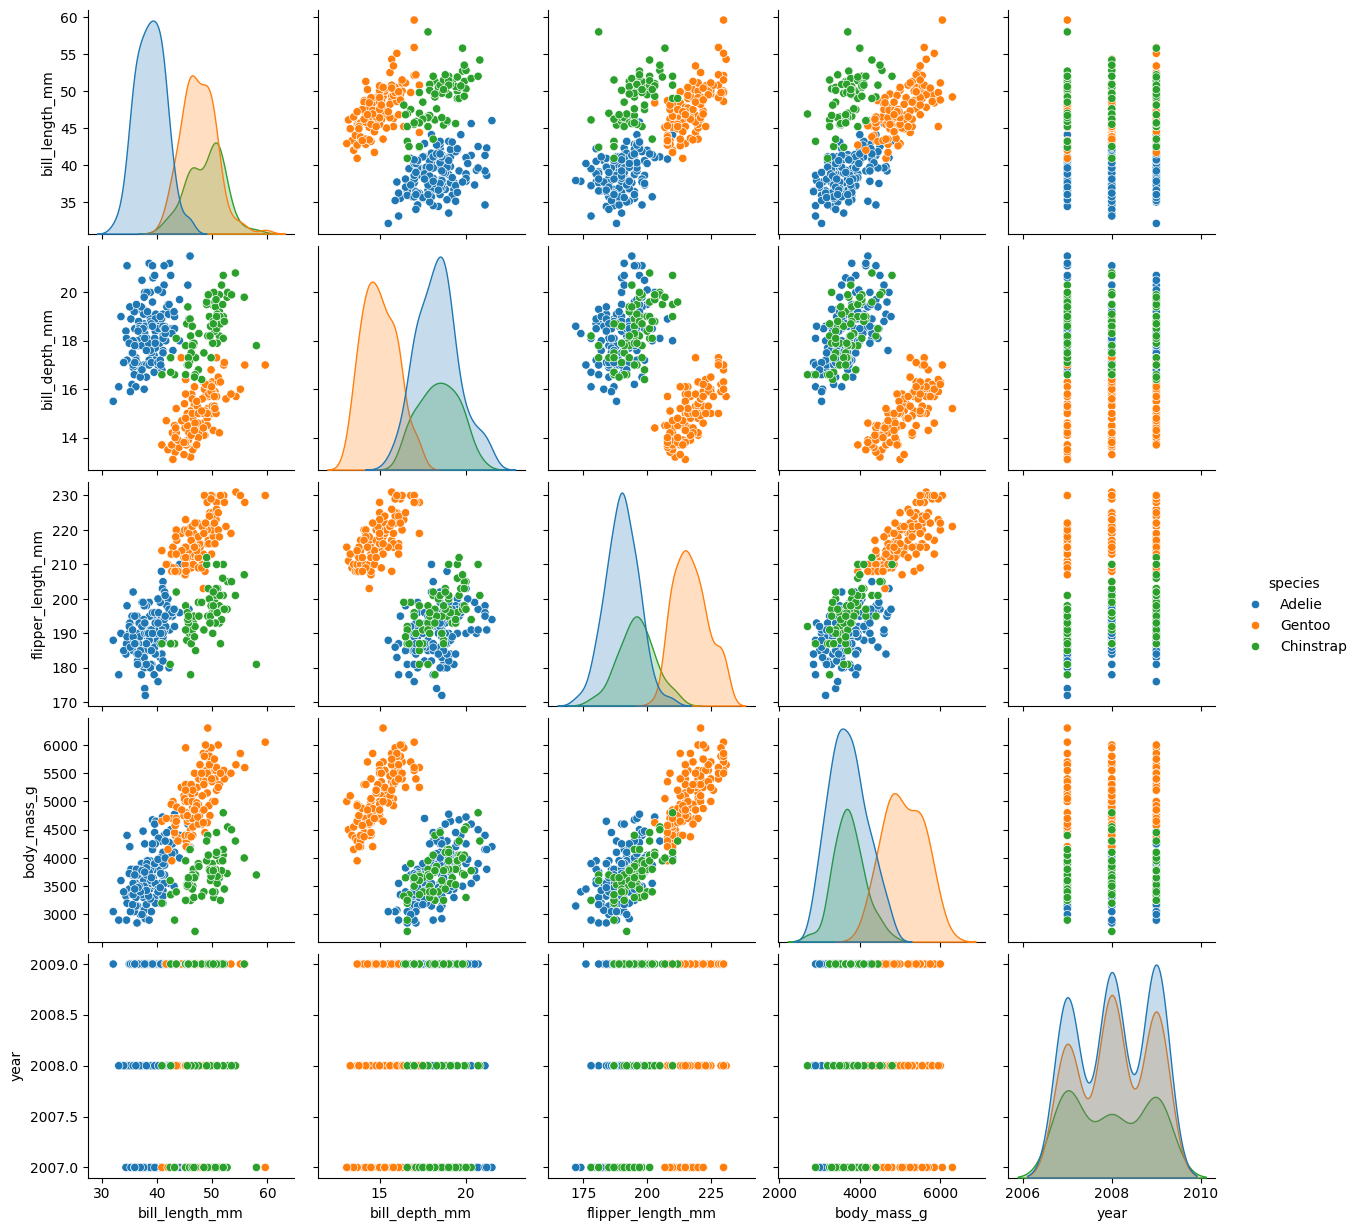

In [4]:
# EDA sencillo
sns.pairplot(df, hue='species')
plt.show()

Podria intentar predecir body_mass_g usando flipper_length_mm como variables predictoras. Filtrando por especie de Gentoo.

In [16]:
# primero estandarizamos porque las variables estan en diferentes escalas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df[['flipper_length_mm', 'body_mass_g']])
df_scaled.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,-1.426752,-0.568475,male,2007
1,Adelie,Torgersen,39.5,17.4,-1.069474,-0.506286,female,2007
2,Adelie,Torgersen,40.3,18.0,-0.426373,-1.190361,female,2007
4,Adelie,Torgersen,36.7,19.3,-0.569284,-0.941606,female,2007
5,Adelie,Torgersen,39.3,20.6,-0.783651,-0.692852,male,2007


## modelo de regresion lineal sencillo para predecir el peso del pingüino

In [19]:
# modelo de regresion lineal sencillo para predecir el peso del pingüino a partir de la longitud del aleta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#valores de X son flipper_length_mm bill_length_mm bill_depth_mm
X = df_scaled[['flipper_length_mm']]
#tenemos que filtrar por especie de Gentoo
X = X[df['species'] == 'Gentoo']
y = df_scaled['body_mass_g']
y = y[df['species'] == 'Gentoo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.19
R^2 Score: 0.38


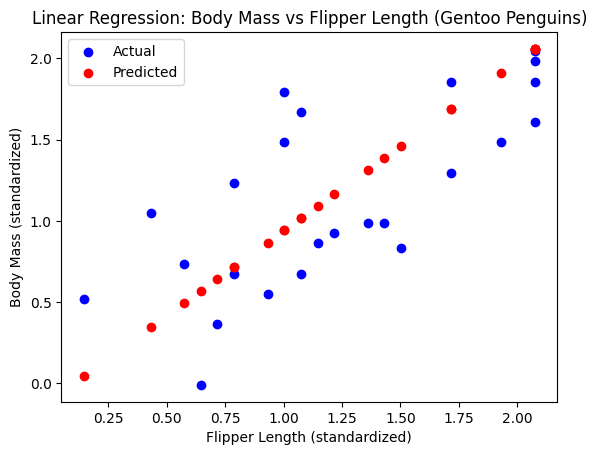

In [20]:
# veamos esta regresion graficamente
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Flipper Length (standardized)')
plt.ylabel('Body Mass (standardized)')
plt.title('Linear Regression: Body Mass vs Flipper Length (Gentoo Penguins)')
plt.legend()
plt.show()

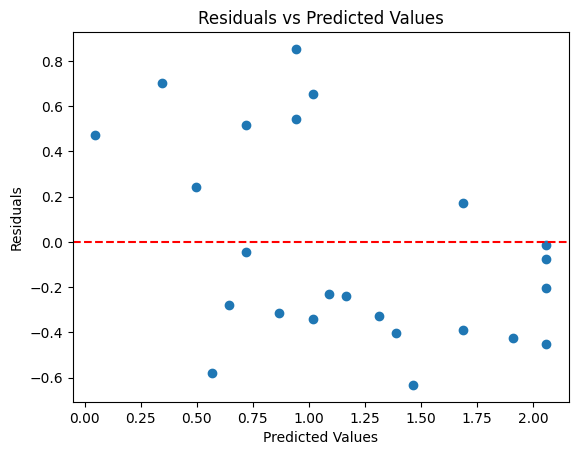

In [23]:
#calcular los residuos y graficarlos
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## modelo de arbol de decision 
haremos un arbol de decision para mejorar la prediccion del peso del pingüino a partir de la longitud del aleta.

Decision Tree Mean Squared Error: 0.178
Decision Tree R^2 Score: 0.413


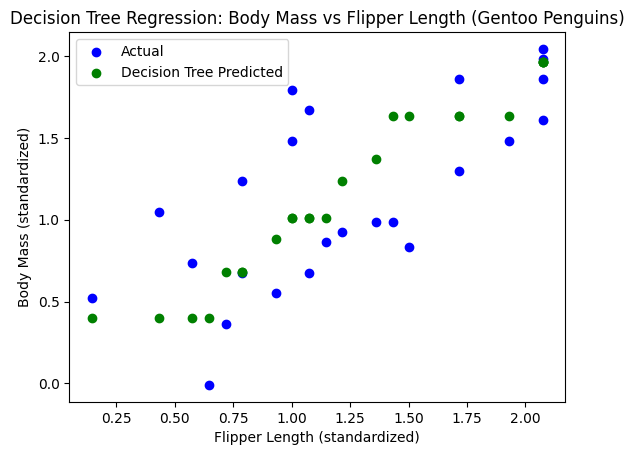

In [25]:
# modelo de arbol de decision para la regresion igual con las mismas variables
from sklearn.tree import DecisionTreeRegressor

# hagamos las hiperparametros max_depth=3 min_samples_split=4
dt_model = DecisionTreeRegressor(max_depth=3, min_samples_split=4, random_state=21)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)
print(f'Decision Tree Mean Squared Error: {dt_mse:.3f}')
print(f'Decision Tree R^2 Score: {dt_r2:.3f}')
# graficamos los resultados del arbol de decision 
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_dt_pred, color='green', label='Decision Tree Predicted')
plt.xlabel('Flipper Length (standardized)')
plt.ylabel('Body Mass (standardized)')
plt.title('Decision Tree Regression: Body Mass vs Flipper Length (Gentoo Penguins)')
plt.legend()
plt.show()

El mse del modelo de regresion lineal es menor que el del arbol de decision, por lo que el modelo de regresion lineal es mejor para este caso. Y el r2 del modelo de regresion lineal es menor que el del arbol de decision, por lo que el modelo de arbol de decision es mejor para este caso. el mse como tal mide el error cuadratico medio, mientras que el r2 mide la varianza explicada por el modelo.

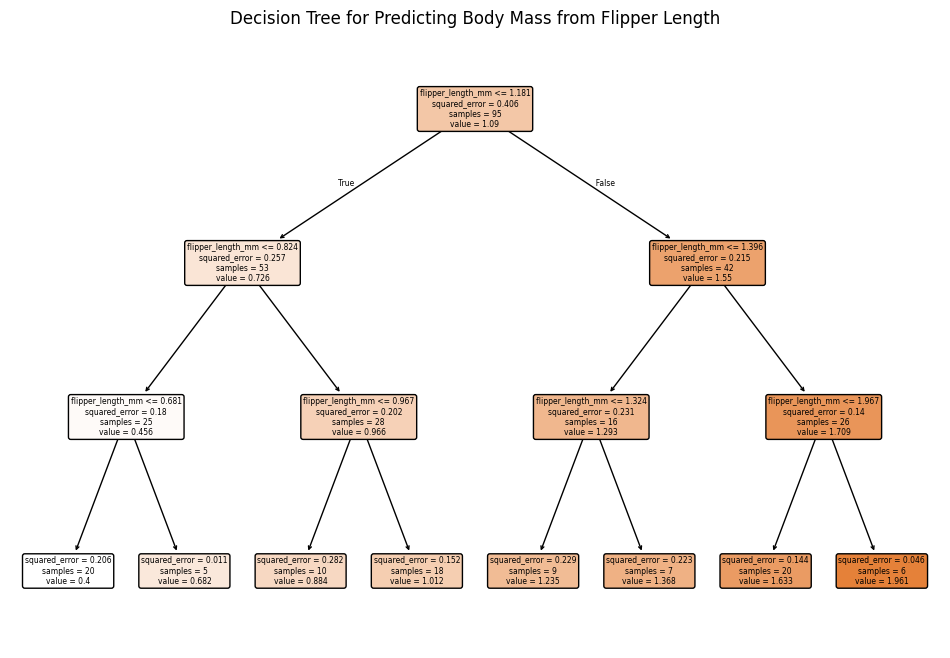

In [26]:
# grafico del arobol de clasificacion
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model, filled=True, feature_names=['flipper_length_mm'], rounded=True)
plt.title('Decision Tree for Predicting Body Mass from Flipper Length')
plt.show()